In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('MockECEDataset 090622.xlsx',sheet_name='Dataset')

In [3]:
df

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred
0,2019-2020,2019SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither
1,2022-2023,2022FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
2,2019-2020,2020SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
3,2020-2021,2020FA,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
4,2019-2020,2020SP,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,2022FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3000,2022-2023,2022FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3001,2022-2023,2022FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3002,2022-2023,2022FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither


In [4]:
df = df.replace(['2019SU','2020SU','2021SU','2021SU','2022SU'],'SU')
df = df.replace(['2019FA','2020FA','2021FA','2021FA','2022FA'],'FA')
df = df.replace(['2019SP','2020SP','2021SP','2021SP','2022SP'],'SP')

In [5]:
df_black= df[df['Ethnicity']=='Black']
df_hispanic = df[df['Ethnicity']=='Hispanic']

In [6]:
def enrolled(df):
    students_enrolled = df[df['StillEnrolled']=='Yes']
    students_enrolled_dummies = pd.get_dummies(students_enrolled[['Academic Year','Term']], columns = ['Term'])
    se = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    print(se)
    se.columns=['FA','SP','SU']
    se= se[['SU','FA','SP']]
    print(se)
    se.plot.bar(color=['red','green','blue'])
    return

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020         40.0     51.0      7.0
2020-2021         64.0     93.0     22.0
2021-2022        145.0    206.0     43.0
2022-2023        431.0      0.0    110.0
                  SU     FA     SP
Academic Year                     
2019-2020        7.0   40.0   51.0
2020-2021       22.0   64.0   93.0
2021-2022       43.0  145.0  206.0
2022-2023      110.0  431.0    0.0


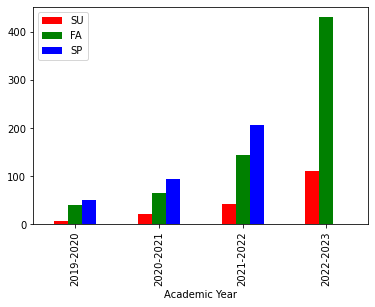

In [7]:
enrolled(df)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           16       21        2
2020-2021           27       37        9
2021-2022           53       75       16
2022-2023          183        0       44
               SU   FA  SP
Academic Year             
2019-2020       2   16  21
2020-2021       9   27  37
2021-2022      16   53  75
2022-2023      44  183   0


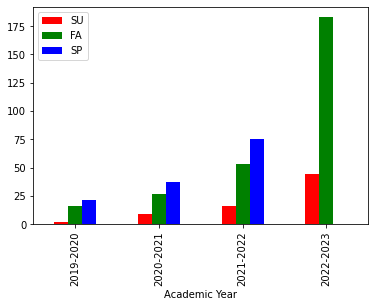

In [8]:
enrolled(df_black)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           22       27        5
2020-2021           34       48       11
2021-2022           79      107       22
2022-2023          199        0       53
               SU   FA   SP
Academic Year              
2019-2020       5   22   27
2020-2021      11   34   48
2021-2022      22   79  107
2022-2023      53  199    0


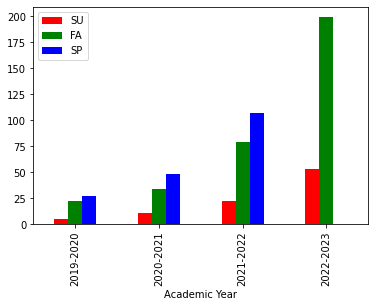

In [9]:
enrolled(df_hispanic)

In [10]:
def graduated(df):
    df_latest = df.drop_duplicates(subset='StudentID',keep='last')
    sg = df_latest[(df_latest['GraduatedTransferred']=='Graduated') | (df_latest['GraduatedTransferred']=='Graduated and Transferred')]
    students_enrolled_dummies = pd.get_dummies(sg[['Academic Year','Term']], columns = ['Term'])
    sg = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    print(sg)
    sg.columns=['FA','SP','SU']
    sg= sg[['SU','FA','SP']]
    print(sg)
    sg.plot.bar(color=['red','green','blue'])
    return

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           53       69       18
2020-2021           52       77        9
2021-2022           59       75        2
2022-2023            0        0       27
               SU  FA  SP
Academic Year            
2019-2020      18  53  69
2020-2021       9  52  77
2021-2022       2  59  75
2022-2023      27   0   0


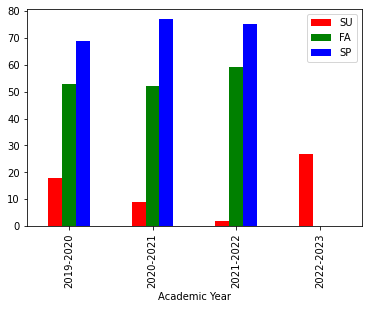

In [11]:
graduated(df)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           25       33        7
2020-2021           26       30        6
2021-2022           30       36        1
2022-2023            0        0        7
               SU  FA  SP
Academic Year            
2019-2020       7  25  33
2020-2021       6  26  30
2021-2022       1  30  36
2022-2023       7   0   0


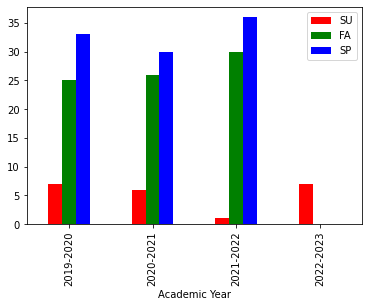

In [12]:
graduated(df_black)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           18       28        9
2020-2021           21       37        2
2021-2022           25       35        1
2022-2023            0        0       18
               SU  FA  SP
Academic Year            
2019-2020       9  18  28
2020-2021       2  21  37
2021-2022       1  25  35
2022-2023      18   0   0


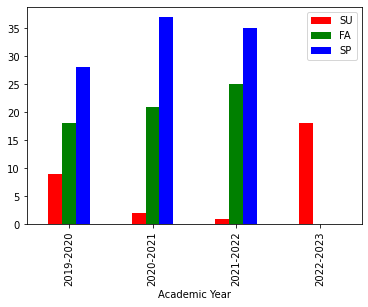

In [13]:
graduated(df_hispanic)

In [14]:
def dropped(df):
    df_latest = df.drop_duplicates(subset='StudentID',keep='last')
    sd = df_latest[(df_latest['GraduatedTransferred']=='Neither') & (df_latest['StillEnrolled']=='No')]
    students_enrolled_dummies = pd.get_dummies(sd[['Academic Year','Term']], columns = ['Term'])
    sg = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    print(sg)
    sg.columns=['FA','SP','SU']
    sg= sg[['SU','FA','SP']]
    print(sg)
    sg.plot.bar(color=['red','green','blue'])
    return

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           28       41       14
2020-2021           29       29        2
2021-2022           24       31       11
2022-2023            0        0       17
               SU  FA  SP
Academic Year            
2019-2020      14  28  41
2020-2021       2  29  29
2021-2022      11  24  31
2022-2023      17   0   0


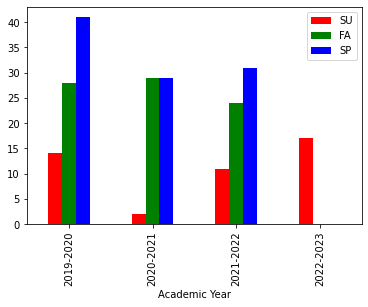

In [15]:
dropped(df)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           12       28        6
2020-2021           13       12        0
2021-2022            9       14        6
2022-2023            0        0        6
               SU  FA  SP
Academic Year            
2019-2020       6  12  28
2020-2021       0  13  12
2021-2022       6   9  14
2022-2023       6   0   0


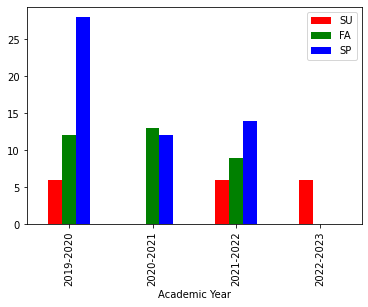

In [16]:
dropped(df_black)

               Term_FA  Term_SP  Term_SU
Academic Year                           
2019-2020           14        9        4
2020-2021           12       13        2
2021-2022           11       14        4
2022-2023            0        0        8
               SU  FA  SP
Academic Year            
2019-2020       4  14   9
2020-2021       2  12  13
2021-2022       4  11  14
2022-2023       8   0   0


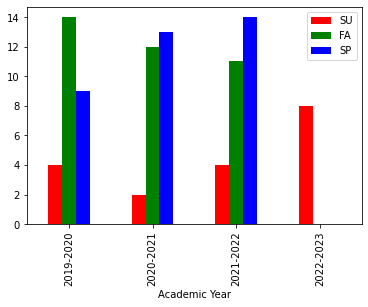

In [17]:
dropped(df_hispanic)

In [18]:
fall=[]
for j in range(2019,2023):
    fall.append('Term_'+str(j)+'FA')
spring=[]
for j in range(2020,2023):
    spring.append('Term_'+str(j)+'SP')
summer=[]
for j in range(2019,2023):
    summer.append('Term_'+str(j)+'SU')
semester=[]
for j in range(2019,2023):
    for x in ['SP','SU','FA']:
        semester.append(str(j)+x)
semester=semester[1:]
key = {x:j for j,x in enumerate(semester)}

In [19]:
df['Term'].value_counts()

FA    1440
SP    1040
SU     524
Name: Term, dtype: int64

In [20]:
key

{'2019SU': 0,
 '2019FA': 1,
 '2020SP': 2,
 '2020SU': 3,
 '2020FA': 4,
 '2021SP': 5,
 '2021SU': 6,
 '2021FA': 7,
 '2022SP': 8,
 '2022SU': 9,
 '2022FA': 10}

In [21]:
df['StudentID'].value_counts()[df['StudentID'].value_counts()>1]

237     11
659     10
921      9
287      9
483      9
        ..
538      2
371      2
369      2
1013     2
931      2
Name: StudentID, Length: 708, dtype: int64

In [22]:
df['semester']= df['Term'].replace(to_replace=key)

In [23]:
df

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP
3,2020-2021,FA,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,FA
4,2019-2020,SP,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP
...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA


In [24]:
df_sorted = df.sort_values(by=['StudentID','semester'])

In [25]:
df_latest = df_sorted.drop_duplicates(subset='StudentID',keep='last')

In [26]:
df_latest

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU
11,2022-2023,FA,5,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA


In [27]:
df_latest['Ethnicity'].value_counts()

Black                        508
Hispanic                     498
White                         67
Asian                         41
Multi-Racial Non-Hispanic     16
Am. Ind                        2
Not Specif                     2
Name: Ethnicity, dtype: int64

In [28]:
df_latest['Gender'].value_counts()

Female     1095
Male         37
(Blank)       2
Name: Gender, dtype: int64

In [29]:
df_latest['graduated'] = [1 if (x=='Graduated') or (x=='Graduated and Transferred') else 0 for x in df_latest['GraduatedTransferred']]

/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_42593/4015435891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['graduated'] = [1 if (x=='Graduated') or (x=='Graduated and Transferred') else 0 for x in df_latest['GraduatedTransferred']]


In [30]:
df_latest

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester,graduated
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU,0
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
11,2022-2023,FA,5,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0


In [31]:
df_latest[df_latest.graduated==1]

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester,graduated
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
20,2021-2022,SU,7,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
22,2021-2022,SP,8,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
27,2021-2022,FA,11,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated and Transferred,FA,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2021-2022,SP,1087,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
2949,2022-2023,SU,1091,Hispanic,Female,Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated,SU,1
2956,2021-2022,SP,1096,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
2981,2021-2022,SP,1113,Hispanic,Female,Human Dev and Family Stu-BC,0425,College Certificate FA-Yes,No,Graduated and Transferred,SP,1


In [32]:
df_latest[['Academic Program','graduated']].groupby(['Academic Program']).sum()

,graduated
Academic Program,
Associate in Applied Science,365
Associate in Arts,14
College Certificate FA-No,1
College Certificate FA-Yes,61


In [33]:
df_latest[['Academic Plan','graduated']].groupby(['Academic Plan']).sum()

,graduated
Academic Plan,
ChDev-PreSchlEd/Infant Todd-AC,9
Child Dev Pre-School Ed-AAS,358
Child Dev Pre-School Ed-AC,18
Child Dev Pre-School Ed-BC,29
Child Development: Early Ch-AA,14
Early Child Sp Ed Endors - BC,0
Human Dev & Family Studies-AAS,7
Human Dev and Family Stu-BC,6


In [34]:
df[df['Gender']=='(Blank)']

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
1742,2022-2023,FA,654,Hispanic,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,Yes,Neither,FA
2012,2021-2022,FA,751,White,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated and Transferred,FA
2013,2021-2022,SP,751,White,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated and Transferred,SP


In [35]:
df_latest['Academic Plan'].value_counts()

Child Dev Pre-School Ed-AAS       847
Child Dev Pre-School Ed-BC        139
Child Development: Early Ch-AA     52
Child Dev Pre-School Ed-AC         45
Human Dev & Family Studies-AAS     20
ChDev-PreSchlEd/Infant Todd-AC     18
Human Dev and Family Stu-BC         8
Early Child Sp Ed Endors - BC       5
Name: Academic Plan, dtype: int64

In [36]:
df_latest['Academic Plan Code'].value_counts()

0278      847
0277      139
0210K      52
0282       45
0391       20
0286       18
0425        8
0429SP      5
Name: Academic Plan Code, dtype: int64

In [37]:
df_latest['Academic Program'].value_counts()

Associate in Applied Science    867
College Certificate FA-Yes      207
Associate in Arts                52
College Certificate FA-No         8
Name: Academic Program, dtype: int64

In [38]:
df_latest['StillEnrolled'].value_counts()

No     703
Yes    431
Name: StillEnrolled, dtype: int64

In [39]:
df_latest['GraduatedTransferred'].value_counts()

Neither                      657
Graduated                    327
Graduated and Transferred    114
Transferred                   36
Name: GraduatedTransferred, dtype: int64

In [40]:
df_latest[df_latest['StillEnrolled']=='Yes']['GraduatedTransferred'].value_counts()

Neither    431
Name: GraduatedTransferred, dtype: int64

In [41]:
df_latest[df_latest['StillEnrolled']=='No']['GraduatedTransferred'].value_counts()

Graduated                    327
Neither                      226
Graduated and Transferred    114
Transferred                   36
Name: GraduatedTransferred, dtype: int64

In [42]:
df[df['StudentID']==237]

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
602,2019-2020,SU,237,Black,Female,Child Development: Early Ch-AA,0210K,Associate in Arts,Yes,Neither,SU
603,2019-2020,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
604,2019-2020,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
605,2020-2021,SU,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SU
606,2020-2021,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
607,2020-2021,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
608,2021-2022,SU,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SU
609,2021-2022,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
610,2021-2022,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
611,2022-2023,SU,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SU


In [43]:
students = df[['StudentID','Ethnicity','Gender','StillEnrolled','GraduatedTransferred']].drop_duplicates()

In [44]:
students

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred
0,1,Asian,Female,No,Neither
1,2,Hispanic,Female,Yes,Neither
2,3,Hispanic,Male,No,Graduated
4,4,Hispanic,Female,No,Graduated
11,5,Black,Female,Yes,Neither
...,...,...,...,...,...
2999,1130,Black,Female,Yes,Neither
3000,1131,Hispanic,Male,Yes,Neither
3001,1132,Hispanic,Female,Yes,Neither
3002,1133,Black,Female,Yes,Neither


In [45]:
students.StudentID.value_counts().sort_values()

1       1
35      1
10      1
16      1
15      1
       ..
1132    1
1133    1
1127    1
1128    1
1134    1
Name: StudentID, Length: 1134, dtype: int64

In [46]:
students_gone = students[(students['StillEnrolled']=='No')&(students['GraduatedTransferred']=='Neither')]

In [47]:
students_gone

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred
0,1,Asian,Female,No,Neither
12,6,Black,Female,No,Neither
23,9,Black,Female,No,Neither
26,10,Black,Female,No,Neither
49,20,Black,Female,No,Neither
...,...,...,...,...,...
2945,1089,Asian,Male,No,Neither
2947,1090,Black,Female,No,Neither
2950,1092,White,Female,No,Neither
2970,1106,Black,Female,No,Neither


In [48]:
226/1134

0.19929453262786595

In [49]:
students['Ethnicity'].value_counts()

Black                        508
Hispanic                     498
White                         67
Asian                         41
Multi-Racial Non-Hispanic     16
Am. Ind                        2
Not Specif                     2
Name: Ethnicity, dtype: int64

In [50]:
students_gone['Ethnicity'].value_counts()

Black                        106
Hispanic                      91
White                         18
Asian                          8
Am. Ind                        1
Not Specif                     1
Multi-Racial Non-Hispanic      1
Name: Ethnicity, dtype: int64

In [51]:
106/508

0.20866141732283464

In [52]:
91/498

0.1827309236947791

In [53]:
18/67

0.26865671641791045

In [54]:
8/41

0.1951219512195122

In [55]:
students_plan = df[['StudentID','Ethnicity','Gender','StillEnrolled','GraduatedTransferred','Academic Plan Code']].drop_duplicates()

In [56]:
students_plan

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred,Academic Plan Code
0,1,Asian,Female,No,Neither,0282
1,2,Hispanic,Female,Yes,Neither,0278
2,3,Hispanic,Male,No,Graduated,0278
4,4,Hispanic,Female,No,Graduated,0278
11,5,Black,Female,Yes,Neither,0278
...,...,...,...,...,...,...
2999,1130,Black,Female,Yes,Neither,0278
3000,1131,Hispanic,Male,Yes,Neither,0278
3001,1132,Hispanic,Female,Yes,Neither,0278
3002,1133,Black,Female,Yes,Neither,0278
